## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading Dataset

In [2]:
data=pd.read_csv("Data_MFR_310.csv")

In [3]:
data.head()

,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,04-05-2018 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-2018 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-2018 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-2018 01:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-2018 03:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [4]:
data.rename(columns={
'Unnamed: 0':'Date_Time', 
'513FC31103.pv':'Propylene flow',
'513HC31114-5.mv':'Hydrogen ratio',
'513PC31201.pv':'Pressure controller',
'513LC31202.pv':'Level controller',
'513FC31409.pv':'Liquefied Recycle gas to R-310 dome top',
'513FC31114-5.pv':'Hydrogen Flow',
'513TC31220.pv':'Temperature controller'
  },inplace=True)

In [5]:
data.columns

Index(['Date_Time', 'Propylene flow', 'Hydrogen ratio', 'Pressure controller',
       'Level controller', 'Liquefied Recycle gas to R-310 dome top',
       'Hydrogen Flow', 'Temperature controller', 'MFR'],
      dtype='object')

In [6]:
data.head()

,Date_Time,Propylene flow,Hydrogen ratio,Pressure controller,Level controller,Liquefied Recycle gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
0,04-05-2018 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-2018 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-2018 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-2018 01:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-2018 03:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


## Remove unnecessary columns

In [7]:
data=data.drop('Date_Time',axis=1)

In [8]:
data.head()

,Propylene flow,Hydrogen ratio,Pressure controller,Level controller,Liquefied Recycle gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Propylene flow                           2486 non-null   float64
 1   Hydrogen ratio                           2560 non-null   float64
 2   Pressure controller                      2484 non-null   float64
 3   Level controller                         2484 non-null   float64
 4   Liquefied Recycle gas to R-310 dome top  2484 non-null   float64
 5   Hydrogen Flow                            2486 non-null   float64
 6   Temperature controller                   2484 non-null   float64
 7   MFR                                      2564 non-null   float64
dtypes: float64(8)
memory usage: 160.4 KB


## Finding the missing values

In [10]:
pd.isnull(data).sum()

Propylene flow                             78
Hydrogen ratio                              4
Pressure controller                        80
Level controller                           80
Liquefied Recycle gas to R-310 dome top    80
Hydrogen Flow                              78
Temperature controller                     80
MFR                                         0
dtype: int64

## Handling Missing values

In [11]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [12]:
data['Propylene flow'] = mean_imputer.fit_transform(data['Propylene flow'].values.reshape(-1,1))
data['Hydrogen ratio'] = mean_imputer.fit_transform(data['Hydrogen ratio'].values.reshape(-1,1))
data['Pressure controller'] = mean_imputer.fit_transform(data['Pressure controller'].values.reshape(-1,1))
data['Level controller'] = mean_imputer.fit_transform(data['Level controller'].values.reshape(-1,1))
data['Liquefied Recycle gas to R-310 dome top'] = mean_imputer.fit_transform(data['Liquefied Recycle gas to R-310 dome top'].values.reshape(-1,1))
data['Hydrogen Flow'] = mean_imputer.fit_transform(data['Hydrogen Flow'].values.reshape(-1,1))
data['Temperature controller'] = mean_imputer.fit_transform(data['Temperature controller'].values.reshape(-1,1))

In [13]:
pd.isnull(data).sum()

Propylene flow                             0
Hydrogen ratio                             0
Pressure controller                        0
Level controller                           0
Liquefied Recycle gas to R-310 dome top    0
Hydrogen Flow                              0
Temperature controller                     0
MFR                                        0
dtype: int64

In [14]:
corr=data.corr()

c:\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


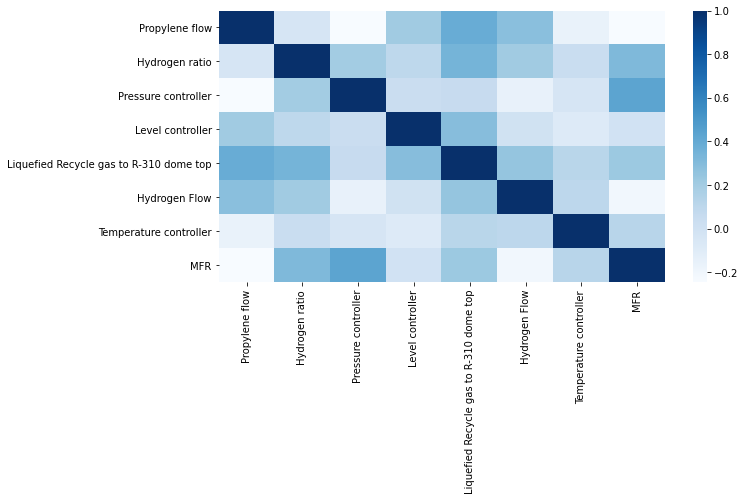

In [15]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(corr,cmap='Blues')

In [16]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [18]:
X_train.shape

(2051, 7)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

## Training the model

In [20]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators =500, random_state = 0)
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [21]:
y_pred=regressor.predict(X_test_transformed)

In [22]:
y_pred[0:20]

array([ 4.0458    , 12.0884    , 12.779     ,  3.643     ,  3.7404    ,
       11.429812  ,  4.1234    ,  3.7478    ,  4.3964    ,  3.9788    ,
        5.8186    ,  4.1338    , 13.8244    ,  5.151     ,  3.5486    ,
       13.20397744,  3.706     ,  4.4364    , 14.8852    , 11.9798    ])

In [23]:
y_test.head(20)

619      3.9
2525    13.1
1231    17.2
1686     3.6
1657     4.0
646     14.6
618      3.6
1683     3.6
195      3.9
2037     3.9
2220     3.7
2056     3.8
716     15.7
1999     4.3
1513     3.3
1875    13.5
1721     4.1
192      4.5
745     14.8
688     11.9
Name: MFR, dtype: float64

In [24]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [25]:
score

0.7249411330565994